In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data = pd.read_csv('Train File.csv')

In [4]:
train_data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [5]:
train_data.describe(include ='all')

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,330045,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
unique,NaN,10,NaN,NaN,NaN,NaN,NaN
top,NaN,c,NaN,NaN,NaN,NaN,NaN
freq,NaN,72458,NaN,NaN,NaN,NaN,NaN
mean,235748.682789,NaN,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,NaN,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,NaN,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,NaN,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,NaN,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,NaN,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


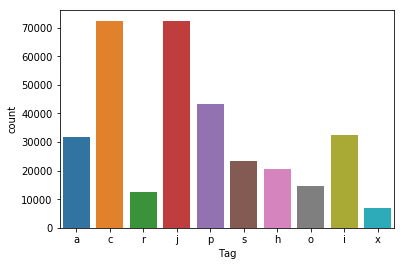

In [7]:
sns.countplot('Tag',data=train_data)

In [10]:
train_data.drop(['ID','Tag','Username'],axis=1,inplace = True)

In [11]:
train_data.head()

,Reputation,Answers,Views,Upvotes
0,3942.0,2.0,7855.0,42.0
1,26046.0,12.0,55801.0,1175.0
2,1358.0,4.0,8067.0,60.0
3,264.0,3.0,27064.0,9.0
4,4271.0,4.0,13986.0,83.0


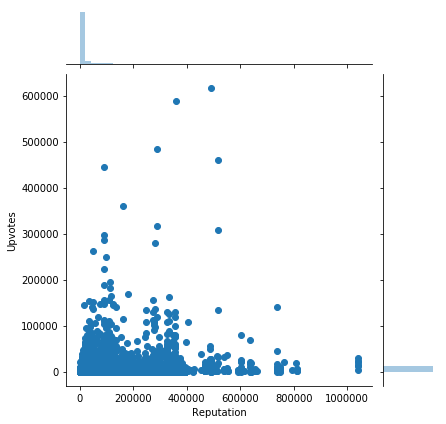

In [12]:
sns.jointplot('Reputation','Upvotes',data=train_data)

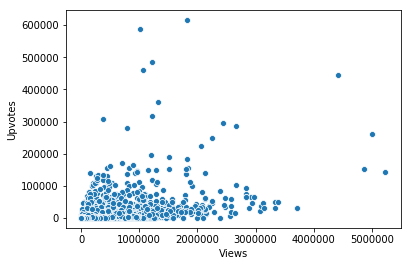

In [13]:
sns.scatterplot('Views','Upvotes',data=train_data)

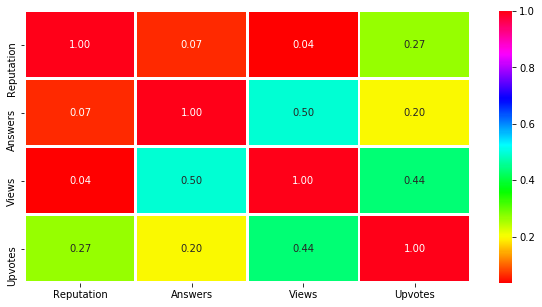

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data.corr(),annot=True,cmap='hsv',fmt='.2f',linewidths=2)
plt.show()

In [15]:
X = train_data.drop(['Upvotes'],axis=1)
y= train_data['Upvotes']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
LR = LinearRegression()

In [20]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
y_pred = LR.predict(X_test)

In [22]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_score: ', metrics.r2_score(y_test,y_pred))

MAE: 615.0954585681773
MSE: 9088112.732861059
RMSE: 3014.6496865906424
R2_score:  0.26219538958789046


In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
R2_score = []
RMSE = []
for i in range(1,6):    
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X_train)
    LR = LinearRegression()
    LR.fit(X_poly,y_train)
    X_ptest=poly_reg.fit_transform(X_test)
    y_pred = LR.predict(X_ptest)
    R2_score.append(metrics.r2_score(y_test,y_pred))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [33]:
for i,j in enumerate(R2_score):
    print('Polynomial Regression model with degree {} has R squared value as {} and RMSE values as {}'.format(i+1,j,RMSE[i]))

Polynomial Regression model with degree 1 has R squared value as 0.2621953895878816 and RMSE values as 3014.6496865906606
Polynomial Regression model with degree 2 has R squared value as 0.8601137770404559 and RMSE values as 1312.6642043885922
Polynomial Regression model with degree 3 has R squared value as 0.8878614017807717 and RMSE values as 1175.2864573948286
Polynomial Regression model with degree 4 has R squared value as 0.7624124318855721 and RMSE values as 1710.7164304075116
Polynomial Regression model with degree 5 has R squared value as -41.92654486579793 and RMSE values as 22994.773563573177


In [34]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
LR = LinearRegression()
LR.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
test_set = pd.read_csv('Test FIle.csv')

In [36]:
test_set.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [38]:
test_set_X = test_set[['Reputation','Answers','Views']]

In [39]:
test_poly = poly_reg.fit_transform(test_set_X)
test_set_upvotes = LR.predict(test_poly)

In [42]:
final_df = pd.concat([test_set['ID'],pd.DataFrame(np.round(test_set_upvotes),columns=['Upvotes'],dtype=int)],axis=1)

In [43]:
final_df.head()

,ID,Upvotes
0,366953,208
1,71864,3
2,141692,35
3,316833,24
4,440445,267


In [44]:
final_df.describe()

,ID,Upvotes
count,141448.000000,141448.000000
mean,235743.073497,346.629150
std,136269.867118,3336.092398
min,7.000000,-1093.000000
25%,117797.000000,30.000000
50%,235830.000000,36.000000
75%,353616.000000,91.000000
max,471488.000000,419402.000000


In [45]:
final_df[final_df['Upvotes']<0].count()

ID         1988
Upvotes    1988
dtype: int64

In [46]:
for i in range(0,final_df['Upvotes'].count()):
    if final_df['Upvotes'][i]<0:
       final_df['Upvotes'][i]= 0

C:\Users\SDS7695\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
final_df[final_df['Upvotes']<0].count()

ID         0
Upvotes    0
dtype: int64

In [48]:
final_df.describe()

,ID,Upvotes
count,141448.000000,141448.000000
mean,235743.073497,346.985161
std,136269.867118,3336.050523
min,7.000000,0.000000
25%,117797.000000,30.000000
50%,235830.000000,36.000000
75%,353616.000000,91.000000
max,471488.000000,419402.000000


In [49]:
final_df.head()

,ID,Upvotes
0,366953,208
1,71864,3
2,141692,35
3,316833,24
4,440445,267


In [55]:
final_df.to_csv("Test_Output.csv", index=False)